In [140]:
import torch
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

from copy import deepcopy
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression

<h2>Exer 4.3</h2>

In [101]:
regressors = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]

def get_data(corruption=None):
    data = pd.DataFrame(list(zip(np.arange(1,25), 
                                 [75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])))
    
    if corruption:
        data.iloc[corruption, 1] = 0
    else:
        pass
    
    X = pd.DataFrame(np.array([data.iloc[:,0]**k for k in range(11)]).T, 
                         columns=['power {}'.format(i) for i in range(11)])
    y = data.iloc[:,1]
    
    return X, y

X, y = get_data()

X

,power 0,power 1,power 2,power 3,power 4,power 5,power 6,power 7,power 8,power 9,power 10
0,1,1,1,1,1,1,1,1,1,1,1
1,1,2,4,8,16,32,64,128,256,512,1024
2,1,3,9,27,81,243,729,2187,6561,19683,59049
3,1,4,16,64,256,1024,4096,16384,65536,262144,1048576
4,1,5,25,125,625,3125,15625,78125,390625,1953125,9765625
5,1,6,36,216,1296,7776,46656,279936,1679616,10077696,60466176
6,1,7,49,343,2401,16807,117649,823543,5764801,40353607,282475249
7,1,8,64,512,4096,32768,262144,2097152,16777216,134217728,1073741824
8,1,9,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
9,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000


In [102]:
def train(regressors, x, y):
    
    coefs = np.empty([11, 4]) 
    COEFS1 = np.empty([24,4])
    for i,model in enumerate(regressors):
        model.fit(x, y)
        coefs[:,i] = model.coef_.ravel()
        COEFS1[:,i] = model.predict(x)
       
    return coefs, COEFS1

r, COEFS1 = train(regressors, X, y)

COEFS1


/Users/alvinbuhat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.059172710289467, tolerance: 0.21445
  model = cd_fast.enet_coordinate_descent(
/Users/alvinbuhat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/alvinbuhat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.25211407924259, tolerance: 0.21445
  model = cd_fast.enet_coordinate_descent(


array([[74.9840198 , 75.67276318, 75.72984564, 76.0598638 ],
       [77.20027831, 74.81355082, 76.13671084, 75.04327864],
       [75.57510965, 73.45875312, 75.49289019, 73.55643133],
       [73.02506736, 71.6769525 , 73.46427979, 71.668479  ],
       [70.00824912, 69.54168026, 70.2931397 , 69.45303215],
       [66.58747235, 67.13153619, 66.55033979, 66.9882097 ],
       [63.02136443, 64.53022008, 62.84513919, 64.35660421],
       [59.70723855, 61.8264343 , 59.61431834, 61.64511976],
       [56.96088822, 59.11360253, 57.03393722, 58.9446341 ],
       [54.87168017, 56.4893339 , 55.04496543, 56.34942277],
       [53.30400649, 54.05454137, 53.45444817, 53.95626701],
       [52.01572387, 51.9120999 , 52.06266389, 51.86314759],
       [50.81811144, 50.16490212, 50.76982358, 50.16740457],
       [49.6975699 , 48.91313662, 49.62918494, 48.96321699],
       [48.84421424, 48.25057756, 48.83293579, 48.33822685],
       [48.57413154, 48.25963111, 48.6387682 , 48.36909804],
       [49.1778348 , 49.

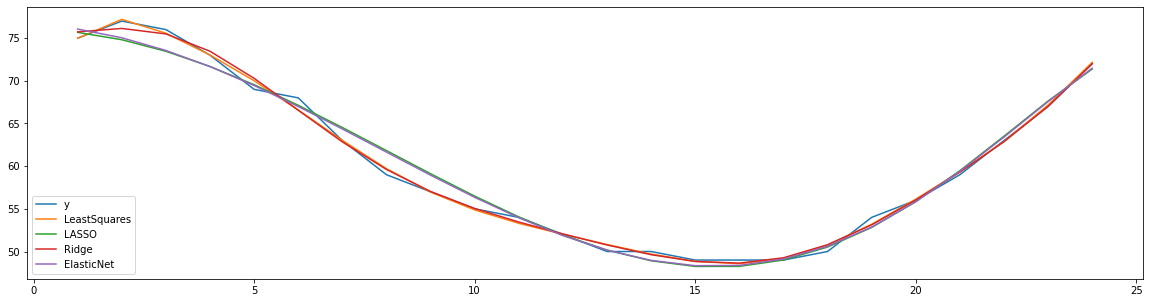

In [103]:
x = np.arange(1,25,1)
plt.rcParams['figure.figsize'] = [20, 5]

plt.plot(x, y, label = "y" )
plt.plot(x, COEFS1[:,0], label = "LeastSquares" )
plt.plot(x, COEFS1[:,1], label = "LASSO" )
plt.plot(x, COEFS1[:,2], label = "Ridge" )
plt.plot(x, COEFS1[:,3], label = "ElasticNet" )
plt.legend()
plt.show()

In [104]:
def losses(models, X, y, names):
    
    ERRORS = np.array([])
    for model in models:
        ERRORS = np.append(ERRORS, MSE(model.predict(X),y))
        
    return pd.DataFrame(ERRORS.reshape(1,-1), columns=names, index=['MSE'])

train_loss = losses(regressors, X, y, [model.__class__.__name__ for model in regressors])
train_loss

,LinearRegression,Lasso,Ridge,ElasticNet
MSE,0.278192,1.533217,0.36198,1.373144


In [105]:
X1, y1 = get_data(corruption=np.random.choice(range(24)))
y1

0     75
1     77
2     76
3     73
4     69
5     68
6     63
7      0
8     57
9     55
10    54
11    52
12    50
13    50
14    49
15    49
16    49
17    50
18    54
19    56
20    59
21    63
22    67
23    72
Name: 1, dtype: int64

<p>Corrupt the 12th temperature.</p>

In [106]:
r2, COEFS2 = train(regressors, X1, y1)
COEFS2

/Users/alvinbuhat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1735.4562353310662, tolerance: 0.5627958333333334
  model = cd_fast.enet_coordinate_descent(
/Users/alvinbuhat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/alvinbuhat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1723.0234221967112, tolerance: 0.5627958333333334
  model = cd_fast.enet_coordinate_descent(


array([[75.67957279, 79.15245077, 72.66293281, 76.37715927],
       [74.50163951, 74.84271778, 76.85418357, 73.42540783],
       [77.17979516, 70.66146014, 79.90099814, 70.26701383],
       [77.0449903 , 66.67324928, 77.10207184, 67.0038987 ],
       [70.29708044, 62.93904066, 68.34571   , 63.73537817],
       [58.85658826, 59.51509808, 57.02621504, 60.55682947],
       [47.67723575, 56.45181709, 47.41108889, 57.55817867],
       [41.16332313, 53.79247815, 42.41675931, 54.82222513],
       [40.92529532, 51.57198052, 42.59092687, 52.42284161],
       [45.46451051, 49.81563557, 46.33277224, 50.42311619],
       [51.38562272, 48.5381321 , 50.94557598, 48.8735384 ],
       [55.27342801, 47.74282871, 53.94719864, 47.81037657],
       [55.3218171 , 47.42157879, 54.09976342, 47.25444835],
       [52.04694175, 47.55535475, 51.79818956, 47.21055165],
       [47.83615361, 48.11600813, 48.71535813, 47.66790095],
       [45.56002825, 49.06958506, 46.87706569, 48.60200381],
       [46.88815889, 50.

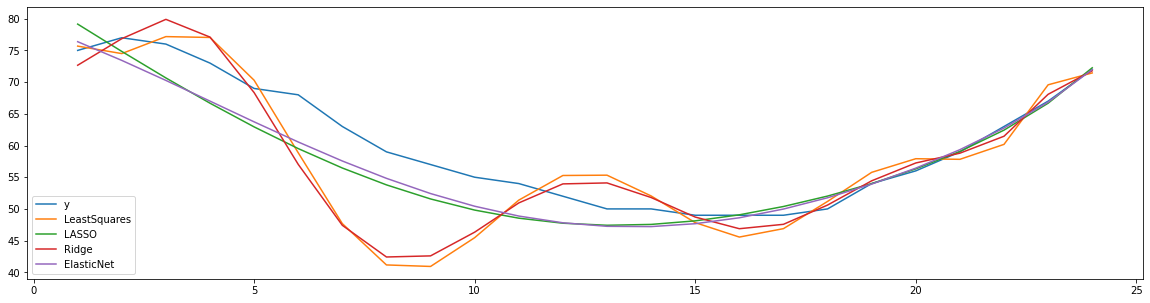

In [107]:
x = np.arange(1,25,1)
plt.rcParams['figure.figsize'] = [20, 5]

plt.plot(x, y, label = "y" )
plt.plot(x, COEFS2[:,0], label = "LeastSquares" )
plt.plot(x, COEFS2[:,1], label = "LASSO" )
plt.plot(x, COEFS2[:,2], label = "Ridge" )
plt.plot(x, COEFS2[:,3], label = "ElasticNet" )
plt.legend()
plt.show()

In [108]:
train_loss2 = losses(regressors, X, y, [model.__class__.__name__ for model in regressors])
train_loss2

,LinearRegression,Lasso,Ridge,ElasticNet
MSE,46.007808,16.394871,41.860717,13.379996


In [109]:
error_diff = train_loss2/train_loss

print('error differed per regressor as follows:')
error_diff 

error differed per regressor as follows:


,LinearRegression,Lasso,Ridge,ElasticNet
MSE,165.38139,10.693119,115.643659,9.744059


<h2>Exer 4.4</h2>

In [110]:
dataset = datasets.MNIST(root="dataset/", download=True)

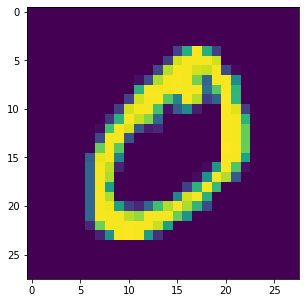

In [131]:
A = dataset.data.reshape(-1,784).numpy()
y = dataset.targets.numpy()

plt.imshow(A[1].reshape(28,28))

In [134]:
B = np.zeros((A.shape[0], 10))
for i in range(len(B)):
    B[i][y[i]] = 1
B

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [135]:
X = np.linalg.lstsq(A,B) #returnleastsquaressolution to Ax=B

<ipython-input-135-5609511bbdbf>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  X = np.linalg.lstsq(A,B) #returnleastsquaressolution to Ax=B


In [164]:
def mape(y_true, y_pred): 
    actual = deepcopy(y_true)
    pred = deepcopy(y_pred)
    actual[actual==0]=12
    pred[pred==0]=12
    err = np.mean(np.abs((actual - pred) / actual)) * 100
    print('mean absolute % error = ', err)

#Check error of leastsquares solution 
mape(y, np.argmax(A@X[0], axis=1))

mean absolute % error =  13.520486772486773


In [145]:
#Determine which pixels are most informative, for my criterion, I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
A_pca = pca.fit_transform(A, y)

In [200]:
#percentage of variance explained by each of the selected components

pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [210]:
#mask no data values here



In [214]:
#visualization
